**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import random

In [2]:
def give_data(to_drop):
    # To read data from diamonds.csv
    headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
    data = pd.read_csv('diamonds.csv', na_values='?',    
             header=None,  names = headers) 
    data = data.reset_index(drop=True)
    data = data.iloc[1:]
    cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
    clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2': 4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

    create_nums = {'cut' : cut_dict, 'clarity':clarity_dict, 'color':color_dict }

    data.replace(create_nums, inplace=True)

    data = data.astype(np.float64, copy=True)

    Y = data['price']
    Y = Y.astype(np.float64)

    data.drop(labels=to_drop, axis=1, inplace=True)
    # TRAIN TEST SPLIT
    X_train, X_test, Y_train, Y_test = train_test_split(data,  Y, test_size=0.20, random_state=40, shuffle=True)
    X_train = np.array(X_train[:30000])  # sub-sampling the data as my machine cannot handle all of it.
    Y_train = np.array(Y_train[:30000])
    X_test = np.array(X_test[:6000])
    Y_test = np.array(Y_test[:6000])
    return X_train, X_test, Y_train, Y_test

In [3]:
# ERROR METRICS
def RSME(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('RSME metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.sqrt(np.mean((Y - Y_hat)**2))/Y.shape[0]

def MSE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MSE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean((Y - Y_hat)**2)/Y.shape[0]

def MAE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MAE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean(np.abs(Y - Y_hat))/Y.shape[0]

In [4]:
def give_mean(X):
    return np.mean(X, axis=0) # take mean along columns

def give_Variance(X):
    return np.var(X, axis=0) # take variance along the columns

def covariance_matrix(X):
    return np.cov(X.T)  # gives the covariance of the columns



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [5]:
# code for knn regression
class KNNRegression:
    def __init__(self, data=None, Y=None):
        self.data = data  # the data is preprocessed already, normalized(if it is required), etc, numpy array
        self.Y = data # numpy array
    
    def train(self, data, Y):
        self.data = data
        self.Y = Y
        
    def give_dist(self, X, Y, p=2):
        dist = np.sum(np.abs(X - Y) ** p)
        if p == 2:
            return math.sqrt(dist)
        else:
            return dist
    def dist_matrix_manhattan(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist_mat[i, :] = np.sum(np.abs(self.data - X_test[i, :]), axis=1)
        return dist_mat
        
    def dist_matrix(self, X):
        dists = -2 * np.dot(X, self.data.T) + np.sum(self.data**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists

    def do_regression(self, dist_mat, k, p=2):
        if p > 2 or p <= 0:
            raise NotImplementedError('p can only take two values')
        indices = np.argpartition(dist_mat, k)
        indices = indices[:, :k]
        values = np.take(self.Y, indices)
        return np.mean(values, axis=1)  # take average along the rows

In [6]:
X_train, X_test, Y_train, Y_test = give_data(['price', 'cut', 'clarity', 'color', 'depth', 'table'])
regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24426404341630936
r2 score is :- 0.8682832208462565


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [7]:
# NORMALISE DATA
mean = give_mean(X_train)
var = give_Variance(X_train)
X_train -= mean
X_train /= var
X_test -= mean
X_test /= var

regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


#### Answer
Yes, it generally helps, but in this specific example it does not make much difference.

For classification/Regression algorithms like **KNN**, we measure the **distances** between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this mis-classification or value prediction, we should normalize the feature variables.

2. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [8]:
# show all the experiments

print('Manhattan Distance')
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

print('Euclidean Distance')
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

Manhattan Distance
RSME metric : 0.24371112382925386
r2 score is :- 0.8688788579116036
Euclidean Distance
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [9]:
# report a table
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, predicted))
print(MSE(Y_test, predicted))

r2 score is :- 0.8656010263045751
MAE metric : 0.13947561507936507
MSE metric : 365.2794027783447


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [10]:
# plot
k_values = np.array([2, 3, 5, 7, 11, 16, 19, 23, 27, 39, 43, 47, 53, 57])
r2scores = []
mse = []
mae = []
for k in k_values:
    predicted = regressor.do_regression(dists, k)
    r2scores.append(r2_score(Y_test, predicted))
    mse.append(mean_squared_error(Y_test, predicted))
    mae.append(mean_absolute_error(Y_test, predicted))
r2scores = np.array(r2scores)
mae = np.array(mae)
mse = np.array(mse)

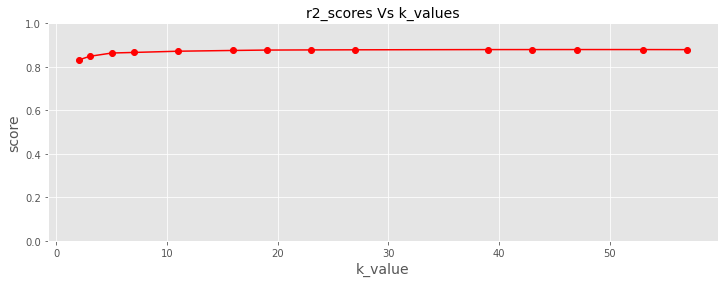

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))
plt.plot(k_values, r2scores, color='red', marker='o')
plt.title('r2_scores Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.ylim(0,1)
plt.show()

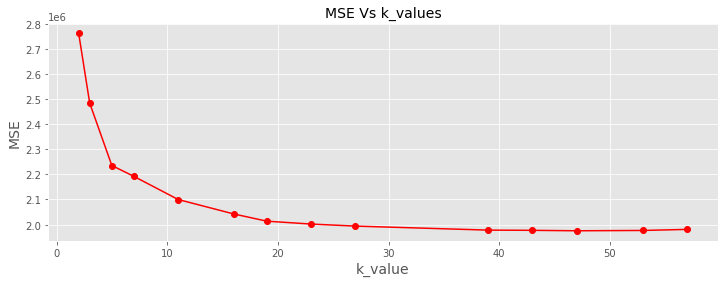

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mse, color='red', marker='o')
plt.title('MSE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid(True)
plt.show()

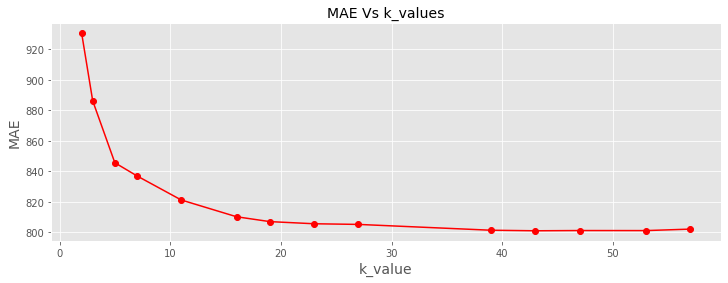

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mae, color='red', marker='o')
plt.title('MAE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.grid(True)
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

#### Explanation
The R-squared improves a little initially but remains the same after that.
This is because R-squared determines the how better our model explains the data, so when increasing K value initially, the R-squared score improves for points which were mixed up. But on taking more number of neighbours the values can be predicted with less noise as the frequency of most frequent class increases relatively compared to the other classes. This reduces noise in the prediction and improves r2_score. 

Cross Validation for best K :- we can use leave one out cross validation and take the average accuracies for each K. we can compare these values to find the best K value. other metrics can also be used instead of simple accuracy.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [14]:
# scikit-learn KNN Regressor
nn = KNeighborsRegressor(7, p=2, weights='distance')
nn.fit(X_train, Y_train)
y_pred = nn.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, y_pred))
print(MSE(Y_test, y_pred))

r2 score is :- 0.861591539658843
MAE metric : 0.14193369668312106
MSE metric : 376.17668009476074


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [15]:
# Comparison
data = [[0.865, 365.279, 0.139],
       [0.861, 376.176, 0.142]]
columns = ('r2_score', 'MSE', 'MAE')
rows = ['My Model          ', 'scikit-learn model']
print('\t\t  ', end='')
for col in columns:
    print(col, end='    ')
print()
for i in range(2):
    print(rows[i], end='  ')
    for val in data[i]:
        print(val, end='  ')
    print()

		  r2_score    MSE    MAE    
My Model            0.865  365.279  0.139  
scikit-learn model  0.861  376.176  0.142  


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?  report this  along with the experiments



#### Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc. train function of **KNNRegression** class just stores the data. 

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. we can add new data by creating another new method **add_data** which will append new data to the existing one.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

#### Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm. My machines hangs when the whole dataset is taken, that is the reason for considering only a subset of it.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In the below Classification task KNN performs very poorly on CIFAR-10 dataset by giving around 28% accuracy.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions. (explanation was provided in one of the above answers)


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [16]:
# Linear Regression
class LinearRegression:
    def __init__(self, train_data, Y):
        self.data = train_data  # It is assumed that data is normalized and shuffled (rows, cols)
        self.Y = Y[:, np.newaxis]
        self.b = np.random.randn()
        print(self.data.shape)
        self.cols = self.data.shape[1]
        self.rows = self.data.shape[0]
        self.weights = np.random.randn(self.cols, 1)  # Initialising weights to 1, shape (cols, 1)
        self.num_iterations = 1000
        self.learning_rate = 0.0001
        self.batch_size = 100
        
    def add_column(self):
        y = np.ones(self.rows)[:, np.newaxis]
        self.data = np.hstack((self.data, y))

    def calc_mini_batches(self):
        new_data = np.hstack((self.data, self.Y))
        np.random.shuffle(new_data)
    
        rem = self.rows % self.batch_size
        num = self.rows // self.batch_size
        till = self.batch_size * num
        if num > 0:
            dd = np.array(np.vsplit(new_data[ :till, :], num))
            X_batch = dd[:, :, :-1]
            Y_batch = dd[:, :, -1]
        
        if rem != 0:
            curr_batch = new_data[till: , :]
            diff = self.batch_size - rem
            temp = np.zeros((diff, self.cols+1)) # appending with zeros so that the sizes can be matched
            curr_batch = np.concatenate((curr_batch, temp))[np.newaxis, :, :]
            if num > 0:
                X_batch = np.concatenate((X_batch, curr_batch[:, :, :-1]))
                Y_batch = np.concatenate((Y_batch, curr_batch[:, :, -1]))
            else:
                X_batch = curr_batch[:, :, :-1]
                Y_batch = curr_batch[:, :, -1]
            
        return X_batch, Y_batch

    def update_weights(self, X, Y):
        Y_Predicted = np.dot(X, self.weights) + self.b  # Remember that X has data stored along the row for one sample
        gradient = np.dot(np.transpose(X), Y_Predicted - Y)
        self.b = self.b - np.sum(Y_Predicted - Y)/(X.shape[0])
        self.weights = self.weights - (self.learning_rate * gradient)/(X.shape[0])
    
    def print_error(self):
        Y_Predicted = self.predict(self.data)
        val = np.sum((Y_Predicted - self.Y) ** 2) / self.rows
        print(val/1000)

    def gradient_descent(self):
        for j in range(self.num_iterations):
            X, Y = self.calc_mini_batches()
            num_batches = X.shape[0]
            for i in range(num_batches):
                self.update_weights(X[i, :, :], Y[i, :][:, np.newaxis])  # update the weights
            if j%20 == 0:
                self.print_error()
    
    def predict(self, X):
        # X is 2 dimensional array, samples along the rows
        return np.dot(X, self.weights) + self.b

In [17]:
X_train, X_test, Y_train, Y_test = give_data(['price'])
linear_reg = LinearRegression(X_train, Y_train)
linear_reg.gradient_descent()

(30000, 9)
13563.172627425158
3601.794709194392
2707.3847237364666
3052.8013286228365
2518.5712075032607
2604.354899794996
2474.071407275512
2467.130178077518
2452.0962976750234
2539.3217512856245
2456.2973550139877
2432.7423088906335
2468.8837419870424
2618.880115702862
2494.2782174100116
2383.3853270349055
2575.4198823939396
2336.9972575752245
2335.5706354254726
2339.3466716873477
2309.2664156861388
2387.044800750734
2296.2443561709697
2332.680413487388
2297.91356901477
2254.4709426992354
2245.238936944649
2262.611345984276
2833.676397865627
2216.889683060304
2207.6325643955406
2199.258964215364
2296.722562852841
2965.745248509806
2223.322523806705
2924.7333808497865
2394.093461539107
2245.539238755334
2443.5106604868324
2150.1868747725293
2123.472799853888
2355.5038009273862
2112.952052164191
2101.1540526524304
2241.696452373344
2355.024177346464
2200.1741445480216
2075.5218256475764
2071.629915662431
2079.3858048741354


In [18]:
print('shape of X_train = {a}'.format(a=X_train.shape))
predicted = linear_reg.predict(X_test)
predicted = predicted.flatten()
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 9)
RSME metric : 0.27179755100977515
r2 score : 0.836915345765614


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [19]:
#code for Correlation between features and the Diamond Price.
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2': 4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

create_nums = {'cut' : cut_dict, 'clarity':clarity_dict, 'color':color_dict }

data.replace(create_nums, inplace=True)

data = data.astype(np.float64, copy=True)
mat = data.corr().abs()
mat.index[mat['price'] >= 0.80].tolist()

['carat', 'price', 'x', 'y', 'z']

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [20]:
# import sklearn model
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = give_data(['price', 'depth', 'table', 'cut', 'clarity', 'color'])
print('shape of X_train = {a}'.format(a=X_train.shape))
lin_reg = LinearRegression().fit(X_train, Y_train)
predicted = lin_reg.predict(X_test)
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 4)
RSME metric : 0.26495218097313206
r2 score : 0.8450266517452688


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? 

In [21]:
X_train, X_test, Y_train, Y_test = give_data(['price'])
print('shape of X_train = {a}'.format(a=X_train.shape))
lin_reg = LinearRegression().fit(X_train, Y_train)
predicted = lin_reg.predict(X_test)
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 9)
RSME metric : 0.21124350441089815
r2 score : 0.90148808856628


**Adding extra features did it make the prediction better or worse.Comment?**

Adding extra features improved the predictions, the r2 score increased from 0.84 to 0.90 and Root mean squared error reduced from 0.26 to 0.21,
The reason is adding features distinguishes between samples which have almost idenctical values which we have considered in our dataset according to correlation with price. for example the clarity and cut of the diamonds does influence its price when all other features have identical values. 

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


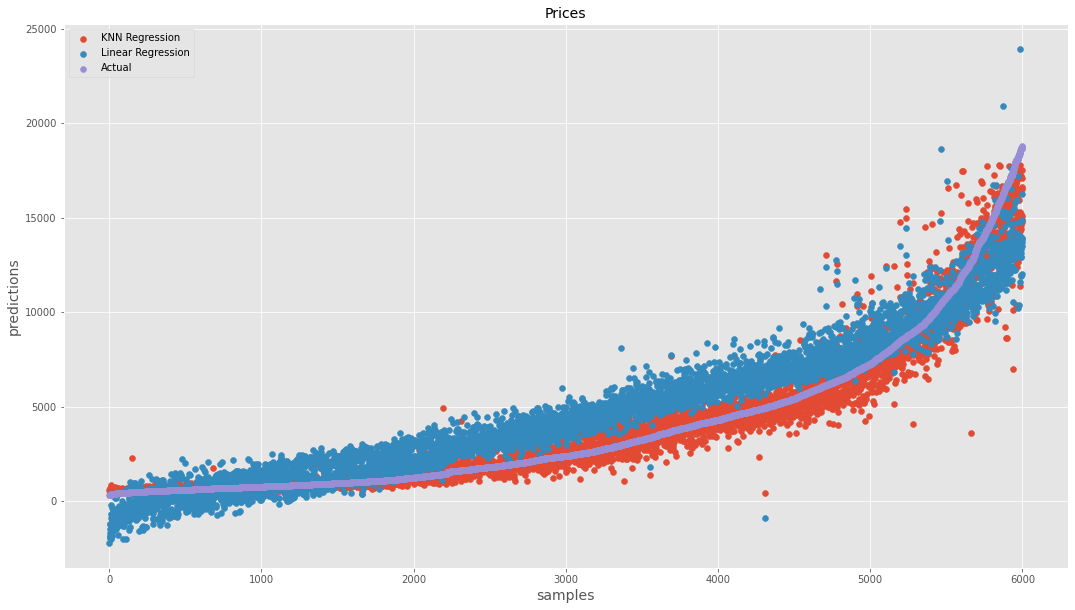

In [22]:
# plot
regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix(X_test)
predicted_knn = regressor.do_regression(dists, k=5)
predicted_linear = linear_reg.predict(X_test)
xx = np.linspace(1,X_test.shape[0], X_test.shape[0])

perm = Y_test.argsort()
Y_test_sorted = np.sort(Y_test)    # Sort the Y_test Prices
predicted_knn = predicted_knn[perm] # shuffle the array in accordance with Y_test
predicted_linear = predicted_linear[perm]

plt.figure(figsize=(18,10))
plt.scatter(xx, predicted_knn, marker='o')
plt.scatter(xx, predicted_linear, marker='o')
plt.scatter(xx, Y_test_sorted, marker='o')
plt.title('Prices', fontsize=14)
plt.xlabel('samples', fontsize=14)
plt.ylabel('predictions', fontsize=14)
plt.legend(['KNN Regression', 'Linear Regression', 'Actual'])
plt.grid(True)
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [23]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [24]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

In [25]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

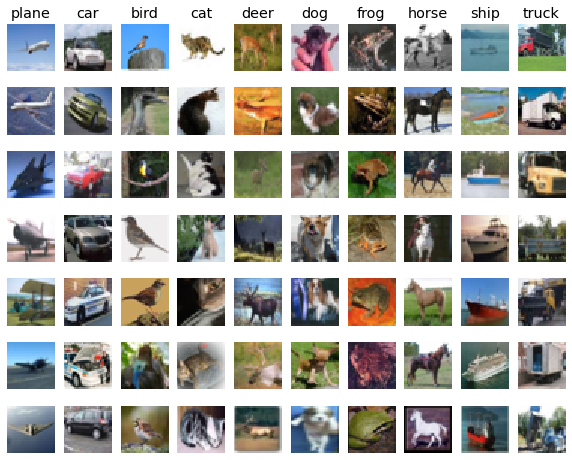

In [26]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [27]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5000, 3072) (500, 3072)
(5000,) (500,)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [28]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor:
    ''' L2 distance is used '''
    def __init__(self):
        self.data = None
        self.Y = None
    
    def train(self, data, Y):
        self.data = data  # numpy array of two dimension, storing samples along axis=0
        self.Y = Y  # numpy array of one dimension

    def give_dist(self, X, Y, p=2):
        dist = np.sum(np.abs(X - Y) ** p)
        if p == 2:
            return math.sqrt(dist)
        else:
            return dist
    
    def dist_matrix_two_loops(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = []
        for i in range(num_test):
            temp = []
            for j in range(num_train):
                dist = self.give_dist(self.data[j, :], X_test[i, :])
                temp.append(dist)
            dist_mat.append(temp)
        return dist_mat
    
    def dist_matrix_one_loop(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist_mat[i, :] = np.sum((self.data - X_test[i, :]) ** 2, axis=1)
        return dist_mat
    
    def dist_matrix(self, X):
        dists = -2 * np.dot(X, self.data.T) + np.sum(self.data**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists

    def predict_labels(self, dist_mat, k=2):
        indices = np.argpartition(dist_mat, k)
        indices = indices[:, :k]
        labels = np.take(self.Y, indices)
        prediction = []
        for row in labels:
            values, counts = np.unique(row, return_counts=True)
            ind = np.argmax(counts)
            prediction.append(values[ind])
        return prediction

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [29]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [30]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.dist_matrix(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [31]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


In [32]:
# Use this cell to compute accuracies for k = 3, 5, 7
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 1))

y_test_pred = classifier.predict_labels(dists, k=3)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 3))

y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 5))

y_test_pred = classifier.predict_labels(dists, k=7)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 7))

Got 137 / 500 correct => accuracy: 0.274000  k: 1
Got 136 / 500 correct => accuracy: 0.272000  k: 3
Got 139 / 500 correct => accuracy: 0.278000  k: 5
Got 137 / 500 correct => accuracy: 0.274000  k: 7


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [33]:
# Use this cell to call the functions

Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [34]:
# Use this cell to present your timing results for computing distance matrix
import time
k_val = [1, 3, 5, 7]
zero_loop = []
one_loop = []
two_loop = []
for loop in range(3):
    for k in k_val:
        if loop == 0:
            t_s = time.time()
            dists = classifier.dist_matrix(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            zero_loop.append(t_f - t_s)
        elif loop == 1:
            t_s = time.time()
            dists = classifier.dist_matrix_one_loop(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            one_loop.append(t_f - t_s)
        else:
            t_s = time.time()
            dists = classifier.dist_matrix_two_loops(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            two_loop.append(t_f - t_s)

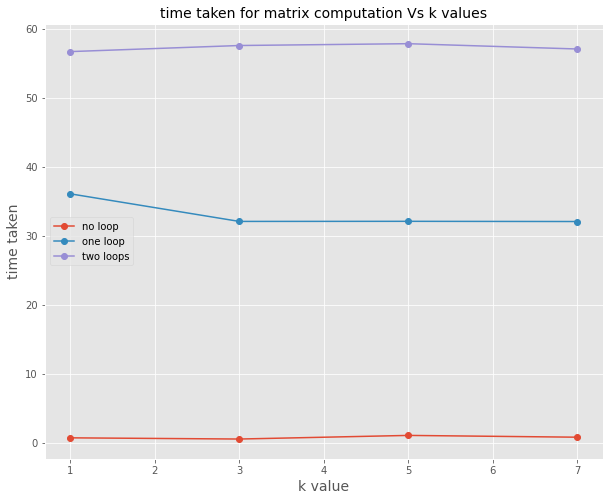

Using no loops is around 200 times faster than using 2 loops


In [35]:
plt.style.use('ggplot')
plt.plot(k_val, zero_loop, marker='o')
plt.plot(k_val, one_loop, marker='o')
plt.plot(k_val, two_loop, marker='o')
plt.title('time taken for matrix computation Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('time taken', fontsize=14)
plt.legend(['no loop', 'one loop', 'two loops'])
plt.grid(True)
plt.show()
print('Using no loops is around 200 times faster than using 2 loops')

As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [36]:
# Use this cell to implement Cross Validation

XX = np.vstack((X_train, X_test))  # stacking the train and test data together 
YY = np.append(y_train, y_test)    # stacking the labels as well
rows = XX.shape[0]
num = rows // 5
batches = np.vsplit(XX, 5)         # split into 5 groups
Y = np.zeros(rows).reshape(5, num) # same for Y
for i in range(5):
    Y[i, :] = np.array(YY[i*num: (i+1)*num])
    
k_values = np.array([1, 3, 5, 7, 23, 27, 39, 73, 117, 177, 233, 257, 297, 333])
mean_accuracy = []
for k in k_values:
    accuracies = []
    for i in range(5):
        x_test = batches[i]
        y_test = Y[i]
        if i == 0:
            curr_X = np.vstack((batches[1], batches[2], batches[3], batches[4]))
            curr_Y = np.vstack((Y[1], Y[2], Y[3], Y[4]))
        elif i == 1:
            curr_X = np.vstack((batches[0], batches[2], batches[3], batches[4]))
            curr_Y = np.vstack((Y[0], Y[2], Y[3], Y[4]))
        elif i == 2:
            curr_X = np.vstack((batches[0], batches[1], batches[3], batches[4]))
            curr_Y = np.vstack((Y[0], Y[1], Y[3], Y[4]))
        elif i == 3:
            curr_X = np.vstack((batches[0], batches[1], batches[2], batches[4]))
            curr_Y = np.vstack((Y[0], Y[1], Y[2], Y[4]))
        else:
            curr_X = np.vstack((batches[0], batches[1], batches[2], batches[3]))
            curr_Y = np.vstack((Y[0], Y[1], Y[2], Y[3]))

        classifier.train(curr_X, curr_Y)
        dists = classifier.dist_matrix(x_test)
        y_test_pred = classifier.predict_labels(dists, k)
        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num
        accuracies.append(accuracy)

    accuracies = np.array(accuracies)
    acc = np.mean(accuracies)
    mean_accuracy.append(acc)     # append the mean accuracy

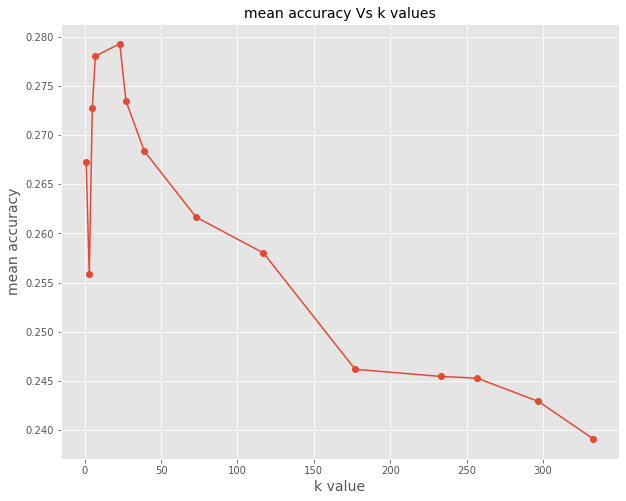

In [37]:
# Plot
plt.style.use('ggplot')
plt.plot(k_values, mean_accuracy, marker='o')
plt.title('mean accuracy Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('mean accuracy', fontsize=14)
plt.grid(True)
plt.show()

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?

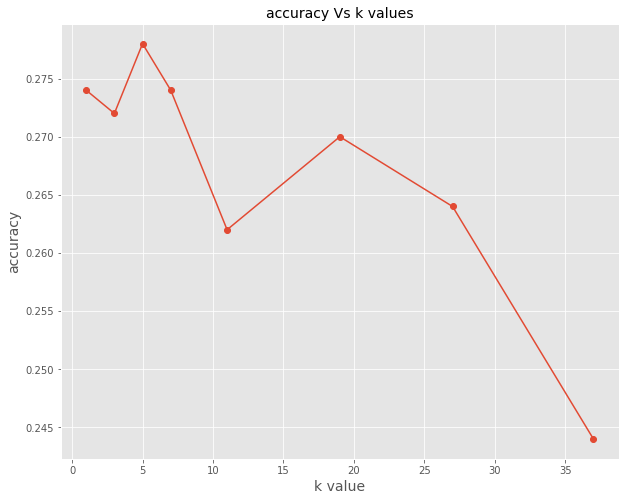

In [38]:
X_train, y_train, X_test, y_test = load_CIFAR10('cifar-10-batches-py')
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

train_mean = np.mean(X_train)
X_train -= train_mean
X_test -= train_mean
k_val = [1, 3, 5, 7, 11, 19, 27, 37]
accu = []
classifier.train(X_train, y_train)
dists = classifier.dist_matrix(X_test)
for k in k_val: 
    y_test_pred = classifier.predict_labels(dists, k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / X_test.shape[0]
    accu.append(accuracy)
    
plt.style.use('ggplot')
plt.plot(k_val, accu, marker='o')
plt.title('accuracy Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.grid(True)
plt.show()

2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?

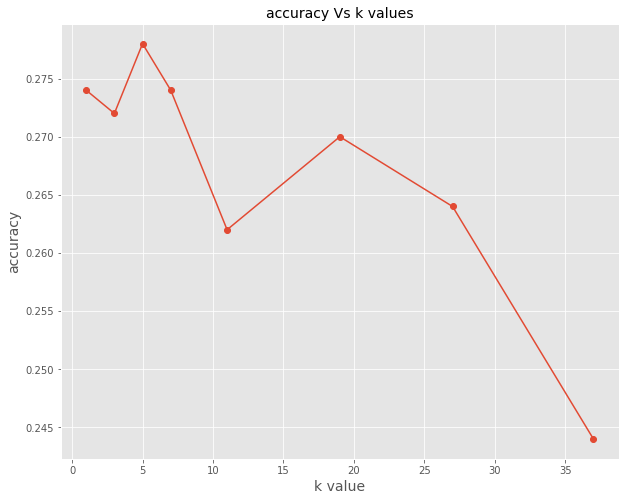

In [39]:
X_train, y_train, X_test, y_test = load_CIFAR10('cifar-10-batches-py')
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

train_mean = np.mean(X_train, axis=0)
X_train -= train_mean
X_test -= train_mean
k_val = [1, 3, 5, 7, 11, 19, 27, 37]
accu = []
classifier.train(X_train, y_train)
dists = classifier.dist_matrix(X_test)
for k in k_val: 
    y_test_pred = classifier.predict_labels(dists, k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / X_test.shape[0]
    accu.append(accuracy)
    
plt.style.use('ggplot')
plt.plot(k_val, accu, marker='o')
plt.title('accuracy Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.grid(True)
plt.show()

3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?

#### Training time complexity
KNN is a lazy learner, actually there is no learning happening in KNN, it just memorises all the training data we supply. So time complexity for training is just the time for storing the data in the class object.
#### Testing time complexity
Distance matrix needs to be computed of size (test * train) which takes O(train * test * D) time complexity assuming D = dimension of each of the sample. But using numpy arrays can speed up this process (vectorisation helps!). After this O(test * K) time is required for finding the K nearest neighbors for each of the test sample using partial sort. Than we just need to find out the most frequent label among the K neighbors which takes O(test * K) time.
#### Non Linear Classifier
It is example of a nonlinear classifier. The decision boundaries of kNN are locally linear segments, but in general have a complex shape that is not equivalent to a line in 2D or a hyperplane in higher dimensions. With KNN you don't have an hyperplane in general. Imagine some dense region of positive points. The decision boundary to classify test instances around those points will look like a curve - not a hyperplane.

4. Bonus: Explore what image features you can use to better the performance of KNN classifier.

#### Dimensionality Reduction techniques
##### PCA
Principal component analysis.
This helps in reduction of dimensionality, which sometimes might be improve the accuracy and definitely reduces the time complexity for KNN, and any other ML algorithm which will further operate on this data. This method tries to find directions which explains the maximum variability in data.  
##### LDA
Linear Discriminant analysis.
This helps in transforming (Linear) a dataset to help in better classification. It tries to maximise the between class  scatter and reduce the variance in a single class so that it becomes more compact. It reduces the time complexity for KNN, and any other ML algorithm which will further operate on this data

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
lda = LinearDiscriminantAnalysis(n_components=9)
lfit = lda.fit(X_train, y_train)
X_r2 = lfit.transform(X_train)
X_test_lda = lfit.transform(X_test)

[0.19821781 0.14210819 0.12289347 0.11349216 0.10523999 0.09485988
 0.08083255 0.07435227 0.06800368]


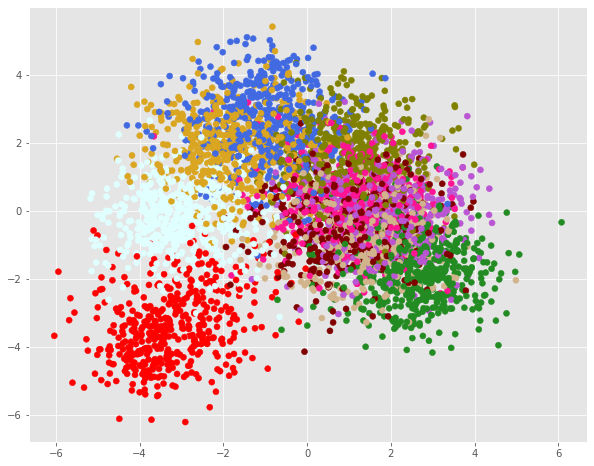

In [41]:
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
print(lda.explained_variance_ratio_)
plt.scatter(X_r2[:,0],X_r2[:,1],c=vectorizer(y_train))

In [42]:
classifier.train(X_r2, y_train)
print(X_r2.shape)
print(X_test_lda.shape)
dists = classifier.dist_matrix(X_test_lda)
y_test_pred = np.array(classifier.predict_labels(dists, k=3))
print(y_test_pred.shape)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test_lda.shape[0]
print(accuracy)

(5000, 9)
(500, 9)
(500,)
0.198


In [43]:
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train)
X_pca = pca_fit.transform(X_train)
X_test_pca = pca_fit.transform(X_test)

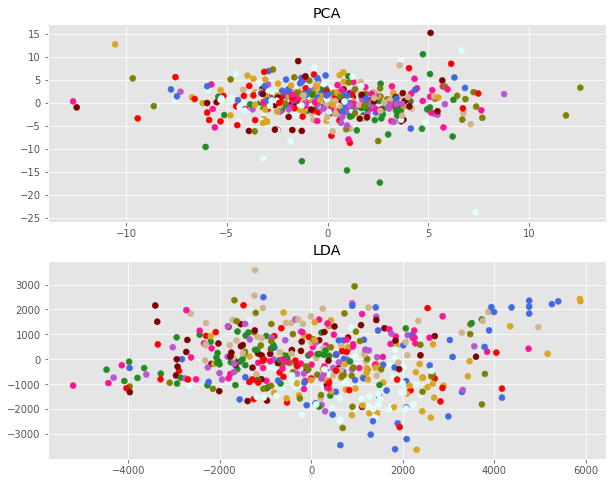

In [44]:
from pylab import *
subplot(2,1,1)
title("PCA")
plt.scatter(X_test_lda[:,0],X_test_lda[:,1],c=vectorizer(y_test))
subplot(2,1,2)
title("LDA")
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=vectorizer(y_test))

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [45]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [46]:
class Node:
    def __init__(self, df, col=None, val=None):
        self.col = col
        self.val = val
        self.df = df
        self.is_leaf = False
        self.label = ''
        self.left_child = None
        self.right_child = None
        # the condition will always be (col_ind '<=' val)

class DecisionTree:
    def __init__(self, train_data, metric, imp_thresh=0.001, max_depth=25):
        self.data = train_data
        self.root = None
        self.metric = metric
        self.impurity_threshold = imp_thresh  # 10% impurity is okay
        self.max_depth = max_depth  # can set this
    
    def impurity(self, left, total):
        if total == 0:
            return 0.0
        if self.metric == 'gini':
            return 2.0 * (left/total) * (1 - left/total)
        elif self.metric == 'entropy':
            right = total - left
            val = 0.0
            if left > 0:
                val = (left/total)*np.log2(total/left)
            if right > 0:
                val += (right/total)*np.log2(total/right)
            return val
        elif self.metric == 'misclassification':
            return min(left/total, 1.0 - left/total)
        else:
            raise NotImplementedError("Only three metrics are available")
    def best_question(self, curr_df):
        # for each column take the splitting points in range(10)
        col = ''
        val = 0
        rows = curr_df.shape[0]
        curr_impurity = 1
        for column in curr_df:
            if column == 'Diagnosis':
                continue
            for v in range(1,10):
                left_df = curr_df[curr_df[column] <= v]
                right_df = curr_df[curr_df[column] > v]
                rows_left = curr_df[curr_df[column] <= v].shape[0]
                rows_right = rows - rows_left
                impurity_left = 0
                impurity_right = 0
                if rows_left > 0:
                    b_left = left_df[left_df.Diagnosis == 2].shape[0]
                    impurity_left = self.impurity(b_left, rows_left)
                if rows_right > 0:
                    b_right = right_df[right_df.Diagnosis == 2].shape[0]
                    impurity_right = self.impurity(b_right, rows_right)

                child_impurity = (rows_left/rows)*impurity_left + (rows_right/rows)*impurity_right
                if child_impurity < curr_impurity:
                    curr_impurity = child_impurity
                    col = column
                    val = v

        return col, int(val)
    
    def build_tree(self, node, depth):
        ''' Recursive function to build tree '''
        rows = node.df.shape[0]
        benign = node.df[node.df.Diagnosis == 2].shape[0]
        impurity = self.impurity(benign, rows)
        if impurity <= self.impurity_threshold or depth >= self.max_depth:
            node.is_leaf = True
            if 2*benign >= rows: 
                node.label = 'benign'
            else:
                node.label = 'malign'
        else:
            col, val = self.best_question(node.df)
            left_df = node.df[node.df[col] <= val]
            right_df = node.df[node.df[col] > val]
            node.col = col
            node.val = val
            left_child = Node(left_df)
            right_child = Node(right_df)
            node.left_child = left_child
            node.right_child = right_child
            self.build_tree(left_child, depth+1)
            self.build_tree(right_child, depth+1)

    def train(self):
        self.root = Node(self.data)
        self.build_tree(self.root,1)

    def dfs(self, node, depth, ff=None):
        indent = ' '*depth*4
        if not node.is_leaf:
            print(indent + 'Is '+str(node.col) + ' <= ' + str(node.val) + '?')
            if ff is not None:
                ff.write(indent + 'Is '+str(node.col) + ' <= ' + str(node.val) + '?\n')
            if node.left_child is not None:
                print(indent + 'True Branch')
                if ff is not None:
                    ff.write(indent + 'True Branch\n')
                self.dfs(node.left_child, depth+1, ff)
            if node.right_child is not None:
                print(indent + 'False Branch')
                if ff is not None:
                    ff.write(indent + 'False Branch\n')
                self.dfs(node.right_child, depth+1, ff)
        else:
            print(indent + node.label)
            if ff is not None:
                ff.write(indent + node.label + '\n')
    
    def recurse(self, node, x):
        if not node.is_leaf:
            if x[node.col] <= node.val and node.left_child is not None:
                return self.recurse(node.left_child, x)
            elif node.right_child is not None:
                return self.recurse(node.right_child, x)
            else:
                return None
        else:
            if node.label == 'benign':
                return 2
            else:
                return 4
        
    def predict(self, X_test):
        ''' X_test is a pandas Dataframe '''
        rows = X_test.shape[0]
        labels = []
        for i in range(rows):
            x = X_test.iloc[i, :]
            labels.append(self.recurse(self.root, x))
        return np.array(labels)

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [47]:
X_train, X_test = train_test_split(data, test_size=0.20, random_state=40, shuffle=True)
print(X_train.shape, X_test.shape)

(559, 10) (140, 10)


In [48]:
dtg = DecisionTree(X_train, 'gini', max_depth=5)
dtg.train()
dte = DecisionTree(X_train, 'entropy', max_depth=5)
dte.train()
dtm = DecisionTree(X_train, 'misclassification', max_depth=5)
dtm.train()

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [49]:
g_pred = dtg.predict(X_test)
e_pred = dte.predict(X_test)
m_pred = dtm.predict(X_test)

In [50]:
correct_g = np.sum(g_pred == X_test['Diagnosis'])
print('gini correct -> {a}'.format(a=correct_g))
correct_e = np.sum(e_pred == X_test['Diagnosis'])
print('entropy correct -> {a}'.format(a=correct_e))
correct_m = np.sum(m_pred == X_test['Diagnosis'])
print('misclassification correct -> {a}'.format(a=correct_m))

from sklearn.metrics import classification_report, confusion_matrix
print('Gini metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], g_pred))
print(classification_report(X_test['Diagnosis'], g_pred))
print('Entropy metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], e_pred))
print(classification_report(X_test['Diagnosis'], e_pred))
print('Misclassification metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], m_pred))
print(classification_report(X_test['Diagnosis'], m_pred))

gini correct -> 128
entropy correct -> 131
misclassification correct -> 131
Gini metric :- 

[[84  6]
 [ 6 44]]
              precision    recall  f1-score   support

           2       0.93      0.93      0.93        90
           4       0.88      0.88      0.88        50

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140

Entropy metric :- 

[[85  5]
 [ 4 46]]
              precision    recall  f1-score   support

           2       0.96      0.94      0.95        90
           4       0.90      0.92      0.91        50

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

Misclassification metric :- 

[[84  6]
 [ 3 47]]
              precision    recall  f1-score   support

           2       0.97      0.93      0.95        90
           4       0.89      0.94    

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

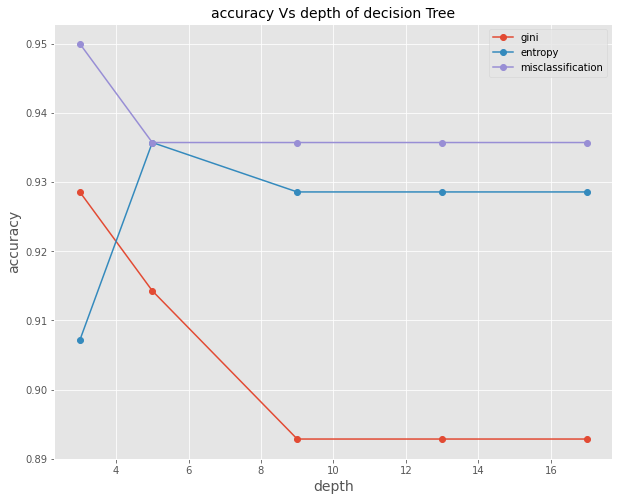

In [51]:
# plot graph by keeping impurity same and varying depth
# print graph for all three metrics gini, entropy and misclassification

depths = [3, 5, 9, 13, 17]
g_accuracy = []
for depth in depths:
    dtg = DecisionTree(X_train, 'gini', max_depth=depth)
    dtg.train()
    g_pred = dtg.predict(X_test)
    accu_g = np.sum(g_pred == X_test['Diagnosis'])/ X_test.shape[0]
    g_accuracy.append(accu_g)

e_accuracy = []
for depth in depths:
    dte = DecisionTree(X_train, 'entropy', max_depth=depth)
    dte.train()
    e_pred = dte.predict(X_test)
    accu_e = np.sum(e_pred == X_test['Diagnosis'])/ X_test.shape[0]
    e_accuracy.append(accu_e)
    
m_accuracy = []
for depth in depths:
    dtm = DecisionTree(X_train, 'misclassification', max_depth=depth)
    dtm.train()
    m_pred = dtm.predict(X_test)
    accu_m = np.sum(m_pred == X_test['Diagnosis'])/ X_test.shape[0]
    m_accuracy.append(accu_m)

plt.style.use('ggplot')
plt.plot(depths, g_accuracy, marker='o')
plt.plot(depths, e_accuracy, marker='o')
plt.plot(depths, m_accuracy, marker='o')
plt.title('accuracy Vs depth of decision Tree', fontsize=14)
plt.xlabel('depth', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend(['gini', 'entropy', 'misclassification'])
plt.grid(True)
plt.show()

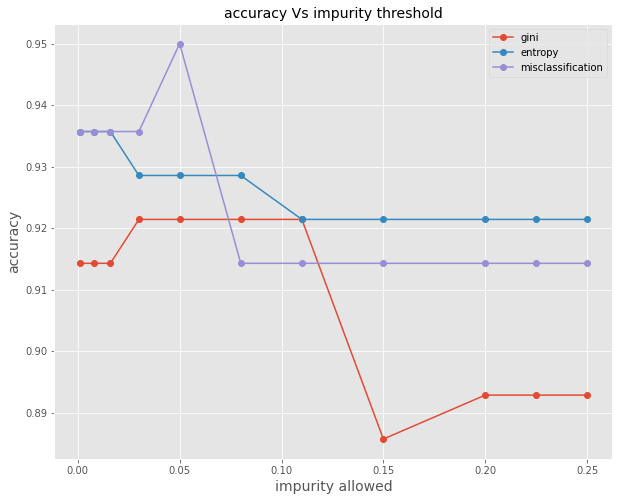

In [52]:
# plot graph by keeping depth same and varying impurity 
impurities = [0.001, 0.008, 0.016, 0.030, 0.050, 0.080, 0.110, 0.150, 0.200, 0.225, 0.250]
g_accuracy = []
for imp in impurities:
    dtg = DecisionTree(X_train, 'gini', max_depth=5, imp_thresh=imp)
    dtg.train()
    g_pred = dtg.predict(X_test)
    accu_g = np.sum(g_pred == X_test['Diagnosis'])/ X_test.shape[0]
    g_accuracy.append(accu_g)

e_accuracy = []
for imp in impurities:
    dte = DecisionTree(X_train, 'entropy', max_depth=5, imp_thresh=imp)
    dte.train()
    e_pred = dte.predict(X_test)
    accu_e = np.sum(e_pred == X_test['Diagnosis'])/ X_test.shape[0]
    e_accuracy.append(accu_e)
    
m_accuracy = []
for imp in impurities:
    dtm = DecisionTree(X_train, 'misclassification', max_depth=5, imp_thresh=imp)
    dtm.train()
    m_pred = dtm.predict(X_test)
    accu_m = np.sum(m_pred == X_test['Diagnosis'])/ X_test.shape[0]
    m_accuracy.append(accu_m)

plt.style.use('ggplot')
plt.plot(impurities, g_accuracy, marker='o')
plt.plot(impurities, e_accuracy, marker='o')
plt.plot(impurities, m_accuracy, marker='o')
plt.title('accuracy Vs impurity threshold', fontsize=14)
plt.xlabel('impurity allowed', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend(['gini', 'entropy', 'misclassification'])
plt.grid(True)
plt.show()

1. e) Does standardisation and normalisation help in this case? Report

Answer: Normalization and standardisation have no impact on the performance of a decision tree. It is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [53]:
from sklearn.tree import DecisionTreeClassifier
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81  7]
 [ 8 44]]
              precision    recall  f1-score   support

           2       0.91      0.92      0.92        88
           4       0.86      0.85      0.85        52

    accuracy                           0.89       140
   macro avg       0.89      0.88      0.88       140
weighted avg       0.89      0.89      0.89       140



3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

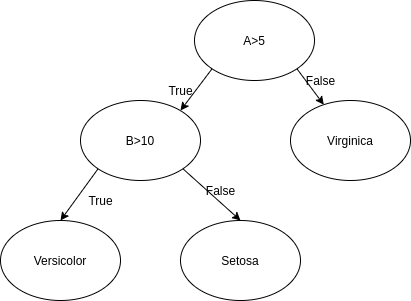
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [55]:
X_train, X_test = train_test_split(data, test_size=0.20, random_state=40, shuffle=True)
ff = open('outputimp.txt', 'w')
dtm = DecisionTree(X_train, 'misclassification', max_depth=5, imp_thresh=0.005)
dtm.train()
dtm.dfs(dtm.root, 0, ff)
ff.close()

Is UCSize <= 3?
True Branch
    Is BN <= 5?
    True Branch
        Is NN <= 7?
        True Branch
            Is CT <= 6?
            True Branch
                benign
            False Branch
                malign
        False Branch
            malign
    False Branch
        Is CT <= 1?
        True Branch
            benign
        False Branch
            malign
False Branch
    Is CT <= 1?
    True Branch
        malign
    False Branch
        Is CT <= 1?
        True Branch
            benign
        False Branch
            Is CT <= 1?
            True Branch
                benign
            False Branch
                malign


4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [56]:
cor_mat = data.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['UCShape', 'Diagnosis']


In [57]:
X = data.drop(labels=['UCShape'], axis=1)
X_train, X_test = train_test_split(X, test_size=0.20)
dtg = DecisionTree(X_train, 'gini', max_depth=5)
dtg.train()
dte = DecisionTree(X_train, 'entropy', max_depth=5)
dte.train()
dtm = DecisionTree(X_train, 'misclassification', max_depth=5)
dtm.train()

g_pred = dtg.predict(X_test)
e_pred = dte.predict(X_test)
m_pred = dtm.predict(X_test)

correct_g = np.sum(g_pred == X_test['Diagnosis'])
print('gini correct -> {a}'.format(a=correct_g))
correct_e = np.sum(e_pred == X_test['Diagnosis'])
print('entropy correct -> {a}'.format(a=correct_e))
correct_m = np.sum(m_pred == X_test['Diagnosis'])
print('misclassification correct -> {a}'.format(a=correct_m))

from sklearn.metrics import classification_report, confusion_matrix
print('Gini metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], g_pred))
print(classification_report(X_test['Diagnosis'], g_pred))
print('Entropy metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], e_pred))
print(classification_report(X_test['Diagnosis'], e_pred))
print('Misclassification metric :- ')
print()
print(confusion_matrix(X_test['Diagnosis'], m_pred))
print(classification_report(X_test['Diagnosis'], m_pred))

gini correct -> 136
entropy correct -> 136
misclassification correct -> 135
Gini metric :- 

[[97  3]
 [ 1 39]]
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       100
           4       0.93      0.97      0.95        40

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Entropy metric :- 

[[97  3]
 [ 1 39]]
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       100
           4       0.93      0.97      0.95        40

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Misclassification metric :- 

[[97  3]
 [ 2 38]]
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       100
           4       0.93      0.95    

#### Explanation
The performance improves a little bit after removing the redundant features, this can be because of mis-classification
due to taking the the wrong path in the decision tree with redundant features, which is resolved by removing theses highly correlated features.

5. Report the advantages and disadvantages of decision trees based on the above question.

### Answer

1. Advantages :
    1. Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
    2. Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
    3. A Decision tree model is very intuitive and gives better accuracies (above 90% in our case).
    
2. Disadvantages :
    1. Decision tree is a little tougher to code as compared with other algorithms
    2. Decision tree training is relatively expensive as the complexity and time has taken are more.
    3. The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.